In [1]:
import sys
from netCDF4 import Dataset
import os
import cmocean as cm
from trackeddy.tracking import *
from trackeddy.datastruct import *
from trackeddy.geometryfunc import *
from trackeddy.init import *
from trackeddy.physics import *
from trackeddy.plotfunc import *
from numpy import *
from pylab import *
import cmocean as cm
%matplotlib inline

/home/156/jm5970/.local/lib/python3.6/site-packages/cmocean/tools.py:76: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not mpl.cbook.is_string_like(rgbin[0]):


In [2]:
def makeGaussian(size, fwhm = 3, center=None):
    """ Make a square gaussian kernel.

    size is the length of a side of the square
    fwhm is full-width-half-maximum, which
    can be thought of as an effective radius.
    """

    x = np.arange(0, size, 1, float)
    y = x[:,np.newaxis]

    if center is None:
        x0 = y0 = size // 2
    else:
        x0 = center[0]
        y0 = center[1]

    return np.exp(-4*np.log(2) * ((x-x0)**2 + (y-y0)**2) / fwhm**2)

def moveGaussian(size,fwhm,center,timestep):
    z=zeros([timestep,size,size])
    for tt in range(0,timestep):
        z[tt,:,:]=makeGaussian(size, fwhm, (center[tt,0],center[tt,1]))
    return z

In [3]:
zz=moveGaussian(40,5,array([[x,x*0+10] for x in linspace(10,30,40)]),40)-\
    moveGaussian(40,5,array([[40-x,x*0+30] for x in linspace(10,30,40)]),40)
    
lat=linspace(0,40,40)
lon=linspace(0,40,40)

In [4]:
eddytdn=analyseddyzt(zz[:,:,:],lon,lat,0,40,1,0.3,0.01,0.01,data_meant='',areamap='',mask=''\
                     ,destdir='',physics='',diagnostics=False,pprint=False)

 0% [=======================================>]100% Time Elapsed: 74 s  

In [5]:
threshold=1
eddysplot=exeddydt(eddytdn,lat,lon,zz[:,:,:],threshold,diagnostics=False)

*******Removing of eddies******
*******End the Removing of eddies******


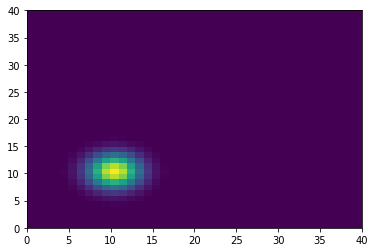

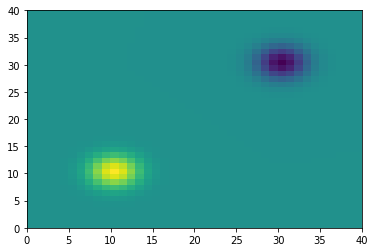

In [6]:
pcolormesh(eddysplot[0,:,:])
figure()
pcolormesh(zz[0,:,:])

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.gridspec as gridspec
import matplotlib.animation as animation
from matplotlib import rc
rc('animation', html='html5')
############################
#Create the figure

fig = plt.figure(figsize=(10, 5),facecolor='white')
gs = gridspec.GridSpec(1, 2)

#############################

ax1 = plt.subplot(gs[0,0])

quad1 = ax1.pcolormesh(lon,lat,eddysplot[0,:,:],shading='gouraud',cmap=cm.cm.tempo,\
              vmin=0,vmax=1)
cb1 = fig.colorbar(quad1,ax=ax1)

ax2 = plt.subplot(gs[0,1])

quad2 = ax2.pcolormesh(lon,lat,zz[0,:,:],shading='gouraud',cmap=cm.cm.balance,\
              vmin=-1,vmax=1)
cb2 = fig.colorbar(quad2,ax=ax2)
##############################

##############################
#Intitial stage blank
def init():
    quad1.set_array([])
    quad2.set_array([])
    return quad1,quad2
##############################

##############################
#Animation function, replace the values of the eke in a '1d list'
def animate(iter):
    quad1.set_array(eddysplot[iter,:,:].ravel())
    quad2.set_array(zz[iter,:,:].ravel())
    return quad1,quad2
##############################

##############################
#Remove edges
gs.tight_layout(fig)
##############################

##############################
#Animation structure
anim2 = animation.FuncAnimation(fig,animate,frames=40,interval=1000,blit=False,repeat=False)
##############################
plt.close()
##############################
#Display and convert animation to html5
anim2

In [8]:
zz=ones([40,40])*linspace(0.2,0,40)
zz=zz+moveGaussian(40,10,array([[x,x*0+10] for x in linspace(10,30,40)]),40)

In [9]:
lat=range(0,40)
lon=range(0,40)
eddytdn=analyseddyzt(zz[:,:,:],lon,lat,0,40,1,0.5,0.01,0.01,data_meant='',areamap='',mask=''\
                     ,destdir='',physics='',diagnostics=False,pprint=False)

 0% [=======================================>]100% Time Elapsed: 132 s  

In [10]:
threshold=1
eddysplot=exeddydt(eddytdn,lat,lon,zz[:,:,:],threshold,diagnostics=False)

*******Removing of eddies******
*******End the Removing of eddies******


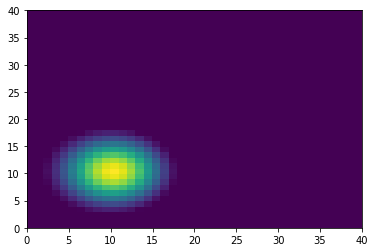

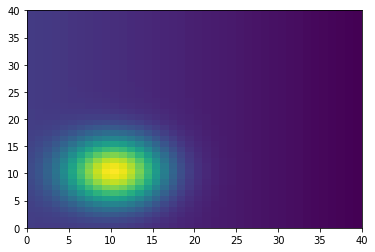

In [11]:
pcolormesh(eddysplot[0,:,:])
figure()
pcolormesh(zz[0,:,:])

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.gridspec as gridspec
import matplotlib.animation as animation
from matplotlib import rc
rc('animation', html='html5')
############################
#Create the figure

fig = plt.figure(figsize=(10, 5),facecolor='white')
gs = gridspec.GridSpec(1, 2)

#############################

ax1 = plt.subplot(gs[0,0])

quad1 = ax1.pcolormesh(lon,lat,eddysplot[0,:,:],shading='gouraud',cmap=cm.cm.tempo,\
              vmin=0,vmax=1)
cb1 = fig.colorbar(quad1,ax=ax1)

ax2 = plt.subplot(gs[0,1])

quad2 = ax2.pcolormesh(lon,lat,zz[0,:,:],shading='gouraud',cmap=cm.cm.balance,\
              vmin=-1,vmax=1)
cb2 = fig.colorbar(quad2,ax=ax2)
##############################

##############################
#Intitial stage blank
def init():
    quad1.set_array([])
    quad2.set_array([])
    return quad1,quad2
##############################

##############################
#Animation function, replace the values of the eke in a '1d list'
def animate(iter):
    quad1.set_array(eddysplot[iter,:,:].ravel())
    quad2.set_array(zz[iter,:,:].ravel())
    return quad1,quad2
##############################

##############################
#Remove edges
gs.tight_layout(fig)
##############################

##############################
#Animation structure
anim2 = animation.FuncAnimation(fig,animate,frames=40,interval=1000,blit=False,repeat=False)
##############################
plt.close()
##############################
#Display and convert animation to html5
anim2

In [13]:
zz=ones([40,40])*linspace(0.2,0,40)
zz=zz+moveGaussian(40,10,array([[40-x,x*0+30] for x in linspace(10,30,40)]),40)+\
    moveGaussian(40,10,array([[x,x*0+10] for x in linspace(10,30,40)]),40)

In [14]:
lat=range(0,40)
lon=range(0,40)
eddytdn=analyseddyzt(zz[:,:,:],lon,lat,0,40,1,0.5,0.01,0.01,data_meant='',areamap='',mask=''\
                     ,destdir='',physics='',diagnostics=False,pprint=False)

 0% [=======================================>]100% Time Elapsed: 162 s  

In [15]:
threshold=1
eddysplot=exeddydt(eddytdn,lat,lon,zz[:,:,:],threshold,diagnostics=False)

*******Removing of eddies******
*******End the Removing of eddies******


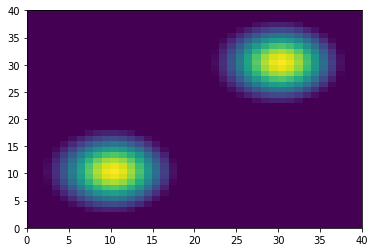

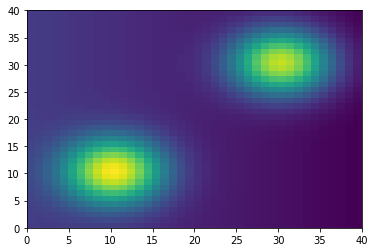

In [16]:
pcolormesh(eddysplot[0,:,:])
figure()
pcolormesh(zz[0,:,:])

In [17]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.gridspec as gridspec
import matplotlib.animation as animation
from matplotlib import rc
rc('animation', html='html5')
############################
#Create the figure

fig = plt.figure(figsize=(10, 5),facecolor='white')
gs = gridspec.GridSpec(1, 2)

#############################

ax1 = plt.subplot(gs[0,0])

quad1 = ax1.pcolormesh(lon,lat,eddysplot[0,:,:],shading='gouraud',cmap=cm.cm.tempo,\
              vmin=0,vmax=1)
cb1 = fig.colorbar(quad1,ax=ax1)

ax2 = plt.subplot(gs[0,1])

quad2 = ax2.pcolormesh(lon,lat,zz[0,:,:],shading='gouraud',cmap=cm.cm.balance,\
              vmin=-1,vmax=1)
cb2 = fig.colorbar(quad2,ax=ax2)
##############################

##############################
#Intitial stage blank
def init():
    quad1.set_array([])
    quad2.set_array([])
    return quad1,quad2
##############################

##############################
#Animation function, replace the values of the eke in a '1d list'
def animate(iter):
    quad1.set_array(eddysplot[iter,:,:].ravel())
    quad2.set_array(zz[iter,:,:].ravel())
    return quad1,quad2
##############################

##############################
#Remove edges
gs.tight_layout(fig)
##############################

##############################
#Animation structure
anim2 = animation.FuncAnimation(fig,animate,frames=40,interval=1000,blit=False,repeat=False)
##############################
plt.close()
##############################
#Display and convert animation to html5
anim2

In [18]:
zz=ones([40,40])*linspace(0.2,0,40)
zz=zz+moveGaussian(40,10,array([[40-x,x*0+30] for x in linspace(10,30,40)]),40)-\
    moveGaussian(40,10,array([[x,x*0+10] for x in linspace(10,30,40)]),40)

In [19]:
lat=range(0,40)
lon=range(0,40)
eddytdn=analyseddyzt(zz[:,:,:],lon,lat,0,40,1,0.5,0.01,0.01,data_meant='',areamap='',mask=''\
                     ,destdir='',physics='',diagnostics=False,pprint=False)

 0% [=======================================>]100% Time Elapsed: 135 s  

In [20]:
threshold=1
eddysplot=exeddydt(eddytdn,lat,lon,zz[:,:,:],threshold,diagnostics=False)

*******Removing of eddies******
*******End the Removing of eddies******


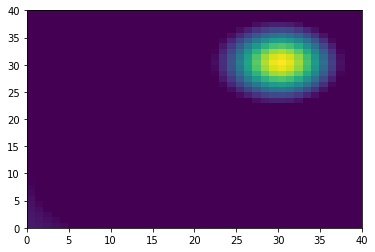

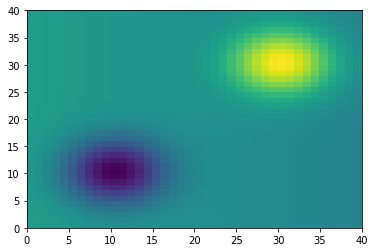

In [21]:
pcolormesh(eddysplot[0,:,:])
figure()
pcolormesh(zz[0,:,:])

In [22]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.gridspec as gridspec
import matplotlib.animation as animation
from matplotlib import rc
rc('animation', html='html5')
############################
#Create the figure

fig = plt.figure(figsize=(10, 5),facecolor='white')
gs = gridspec.GridSpec(1, 2)

#############################

ax1 = plt.subplot(gs[0,0])

quad1 = ax1.pcolormesh(lon,lat,eddysplot[0,:,:],shading='gouraud',cmap=cm.cm.tempo,\
              vmin=0,vmax=1)
cb1 = fig.colorbar(quad1,ax=ax1)

ax2 = plt.subplot(gs[0,1])

quad2 = ax2.pcolormesh(lon,lat,zz[0,:,:],shading='gouraud',cmap=cm.cm.balance,\
              vmin=-1,vmax=1)
cb2 = fig.colorbar(quad2,ax=ax2)
##############################

##############################
#Intitial stage blank
def init():
    quad1.set_array([])
    quad2.set_array([])
    return quad1,quad2
##############################

##############################
#Animation function, replace the values of the eke in a '1d list'
def animate(iter):
    quad1.set_array(eddysplot[iter,:,:].ravel())
    quad2.set_array(zz[iter,:,:].ravel())
    return quad1,quad2
##############################

##############################
#Remove edges
gs.tight_layout(fig)
##############################

##############################
#Animation structure
anim2 = animation.FuncAnimation(fig,animate,frames=40,interval=1000,blit=False,repeat=False)
##############################
plt.close()
##############################
#Display and convert animation to html5
anim2

In [25]:
zz=ones([20,20])*linspace(0.2,0,20)
zz=zz+moveGaussian(20,7,array([[20-x,x*0+15] for x in linspace(5,15,40)]),40)-\
    moveGaussian(20,7,array([[x,x*0+7.5] for x in linspace(5,15,40)]),40)

In [29]:
lat=range(0,20)
lon=range(0,20)
eddytdn=analyseddyzt(zz[:,:,:],lon,lat,0,40,1,0.5,0.2,0.01,data_meant='',areamap='',mask=''\
                     ,destdir='',physics='',diagnostics=False,pprint=False)

 0% [=======================================>]100% Time Elapsed: 90 s  

In [30]:
threshold=1
eddysplot=exeddydt(eddytdn,lat,lon,zz[:,:,:],threshold,diagnostics=False)

*******Removing of eddies******
*******End the Removing of eddies******


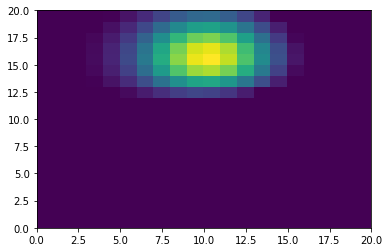

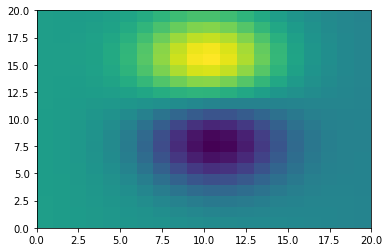

In [31]:
pcolormesh(eddysplot[20,:,:])
figure()
pcolormesh(zz[20,:,:])

In [32]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.gridspec as gridspec
import matplotlib.animation as animation
from matplotlib import rc
rc('animation', html='html5')
############################
#Create the figure

fig = plt.figure(figsize=(10, 5),facecolor='white')
gs = gridspec.GridSpec(1, 2)

#############################

ax1 = plt.subplot(gs[0,0])

quad1 = ax1.pcolormesh(lon,lat,eddysplot[0,:,:],shading='gouraud',cmap=cm.cm.tempo,\
              vmin=0,vmax=1)
cb1 = fig.colorbar(quad1,ax=ax1)

ax2 = plt.subplot(gs[0,1])

quad2 = ax2.pcolormesh(lon,lat,zz[0,:,:],shading='gouraud',cmap=cm.cm.balance,\
              vmin=-1,vmax=1)
cb2 = fig.colorbar(quad2,ax=ax2)
##############################

##############################
#Intitial stage blank
def init():
    quad1.set_array([])
    quad2.set_array([])
    return quad1,quad2
##############################

##############################
#Animation function, replace the values of the eke in a '1d list'
def animate(iter):
    quad1.set_array(eddysplot[iter,:,:].ravel())
    quad2.set_array(zz[iter,:,:].ravel())
    return quad1,quad2
##############################

##############################
#Remove edges
gs.tight_layout(fig)
##############################

##############################
#Animation structure
anim2 = animation.FuncAnimation(fig,animate,frames=40,interval=1000,blit=False,repeat=False)
##############################
plt.close()
##############################
#Display and convert animation to html5
anim2

In [33]:
zz=ones([20,20])*0.2*sin(linspace(1,2*pi,20))
zz=zz+moveGaussian(20,7,array([[20-x,x*0+15] for x in linspace(5,15,40)]),40)-\
    moveGaussian(20,7,array([[x,x*0+7.5] for x in linspace(5,15,40)]),40)

In [ ]:
lat=range(0,20)
lon=range(0,20)
eddytdn=analyseddyzt(zz[:,:,:],lon,lat,0,40,1,0.5,0.01,0.01,data_meant='',areamap='',mask=''\
                     ,destdir='',physics='',diagnostics=False,pprint=False)

In [ ]:
threshold=1
eddysplot=exeddydt(eddytdn,lat,lon,zz[:,:,:],threshold,diagnostics=False)

In [ ]:
pcolormesh(eddysplot[20,:,:])
figure()
pcolormesh(zz[20,:,:])

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.gridspec as gridspec
import matplotlib.animation as animation
from matplotlib import rc
rc('animation', html='html5')
############################
#Create the figure

fig = plt.figure(figsize=(10, 5),facecolor='white')
gs = gridspec.GridSpec(1, 2)

#############################

ax1 = plt.subplot(gs[0,0])

quad1 = ax1.pcolormesh(lon,lat,eddysplot[0,:,:],shading='gouraud',cmap=cm.cm.tempo,\
              vmin=0,vmax=1)
cb1 = fig.colorbar(quad1,ax=ax1)

ax2 = plt.subplot(gs[0,1])

quad2 = ax2.pcolormesh(lon,lat,zz[0,:,:],shading='gouraud',cmap=cm.cm.balance,\
              vmin=-1,vmax=1)
cb2 = fig.colorbar(quad2,ax=ax2)
##############################

##############################
#Intitial stage blank
def init():
    quad1.set_array([])
    quad2.set_array([])
    return quad1,quad2
##############################

##############################
#Animation function, replace the values of the eke in a '1d list'
def animate(iter):
    quad1.set_array(eddysplot[iter,:,:].ravel())
    quad2.set_array(zz[iter,:,:].ravel())
    return quad1,quad2
##############################

##############################
#Remove edges
gs.tight_layout(fig)
##############################

##############################
#Animation structure
anim2 = animation.FuncAnimation(fig,animate,frames=40,interval=1000,blit=False,repeat=False)
##############################
plt.close()
##############################
#Display and convert animation to html5
anim2

In [ ]:
noise = random.normal(0,1,100)

In [36]:
zz=0
zz=zz+moveGaussian(40,13,array([[40-x,x*0+20] for x in linspace(10,30,40)]),40)\
    -moveGaussian(40,8,array([[x,x*0+15] for x in linspace(10,30,40)]),40)

In [37]:
lat=range(0,40)
lon=range(0,40)
eddytdn=analyseddyzt(zz[:,:,:],lon,lat,0,40,1,0.5,0.01,0.01,data_meant='',areamap='',mask=''\
                     ,destdir='',physics='',diagnostics=False,pprint=False)

 0% [=======================================>]100% Time Elapsed: 139 s  

In [38]:
threshold=1
eddysplot=exeddydt(eddytdn,lat,lon,zz[:,:,:],threshold,diagnostics=False)

*******Removing of eddies******
*******End the Removing of eddies******


In [39]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.gridspec as gridspec
import matplotlib.animation as animation
from matplotlib import rc
rc('animation', html='html5')
############################
#Create the figure

fig = plt.figure(figsize=(10, 5),facecolor='white')
gs = gridspec.GridSpec(1, 2)

#############################

ax1 = plt.subplot(gs[0,0])

quad1 = ax1.pcolormesh(lon,lat,eddysplot[0,:,:],shading='gouraud',cmap=cm.cm.tempo,\
              vmin=0,vmax=1)
cb1 = fig.colorbar(quad1,ax=ax1)

ax2 = plt.subplot(gs[0,1])

quad2 = ax2.pcolormesh(lon,lat,zz[0,:,:],shading='gouraud',cmap=cm.cm.balance)
cb2 = fig.colorbar(quad2,ax=ax2)
##############################

##############################
#Intitial stage blank
def init():
    quad1.set_array([])
    quad2.set_array([])
    return quad1,quad2
##############################

##############################
#Animation function, replace the values of the eke in a '1d list'
def animate(iter):
    quad1.set_array(eddysplot[iter,:,:].ravel())
    quad2.set_array(zz[iter,:,:].ravel())
    return quad1,quad2
##############################

##############################
#Remove edges
gs.tight_layout(fig)
##############################

##############################
#Animation structure
anim2 = animation.FuncAnimation(fig,animate,frames=40,interval=1000,blit=False,repeat=False)
##############################
plt.close()
##############################
#Display and convert animation to html5
anim2

In [40]:
print(shape(zz))

(40, 40, 40)


In [41]:
def makeGaussian(size, fwhm = 3, center=None):
    """ Make a square gaussian kernel.

    size is the length of a side of the square
    fwhm is full-width-half-maximum, which
    can be thought of as an effective radius.
    """

    x = np.arange(0, size, 1, float)
    y = x[:,np.newaxis]

    if center is None:
        x0 = y0 = size // 2
    else:
        x0 = center[0]
        y0 = center[1]

    return np.exp(-4*np.log(2) * ((x-x0)**2 + (y-y0)**2) / fwhm**2)

def moveGaussian(size,fwhm,center,timestep):
    z=zeros([timestep,size,size])
    for tt in range(0,timestep):
        z[tt,:,:]=makeGaussian(size, fwhm, (center[tt,0],center[tt,1]))
    return z

In [42]:
import scipy.optimize as opt

def twoD_Gaussian(coords, amplitude, xo, yo, sigma_x, sigma_y, theta, offset):
    '''
    *************** twoD_Gaussian *******************
    Build a 2D gaussian.
    Notes:
        
    Args:
        coords [x,y] (list|array): Coordinates in x and y.
        amplitude (float): Amplitud of gaussian.
        x0 , yo (float): Center of Gausian.
        sigma_x,sigma_y (float): Deviation.
        theta (Float): Orientation.
        offset (Float): Gaussian Offset.
    Returns:
        g.ravel().reshape(len(x),len(y)) (list|array) - Gaussian surface.
    Usage:
        Check scan_eddym function.
    '''
    x=coords[0]
    y=coords[1]
    xo = float(xo)
    yo = float(yo)    
    a = (np.cos(theta)**2)/(2*sigma_x**2) + (np.sin(theta)**2)/(2*sigma_y**2)
    b = -(np.sin(2*theta))/(4*sigma_x**2) + (np.sin(2*theta))/(4*sigma_y**2)
    c = (np.sin(theta)**2)/(2*sigma_x**2) + (np.cos(theta)**2)/(2*sigma_y**2)
    g = offset + amplitude*np.exp( - (a*((x-xo)**2) + 2*b*(x-xo)*(y-yo) + c*((y-yo)**2)))
    return g.ravel()

In [43]:
import scipy.optimize as opt

(0.81623866389096411, array([19]), array([22]), 3, 1, 1, 1)
(40, 40, 40)


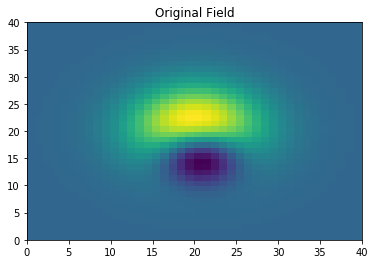

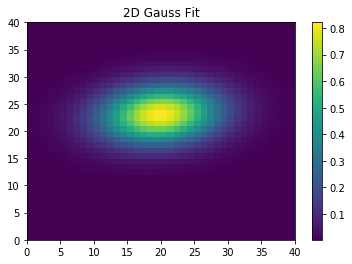

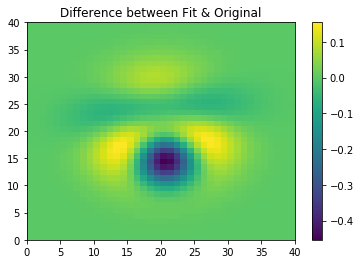

(-0.40148799484387132, array([20]), array([14]), 3, 1, 1, 1)
(40, 40, 40)


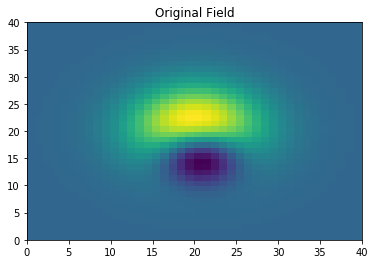

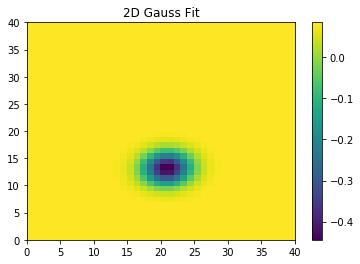

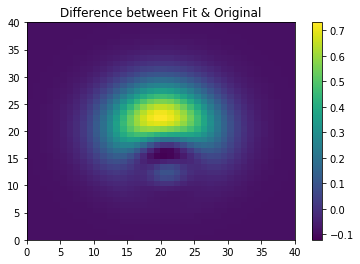

(40, 40)


In [44]:
tt=20
x = np.linspace(0, 40, 40)
y = np.linspace(0, 40, 40)
x, y = np.meshgrid(x, y)
coords=[x,y]


yp,xp=np.where(zz[tt,:,:]==zz[tt,:,:].max())
initial_guess = (1,xp,yp,3,1,1,1)
poptp, pcov = opt.curve_fit(twoD_Gaussian, coords, zz[tt,:,:].ravel(), p0=initial_guess)

yp,xp=np.where(zz[tt,:,:]==zz[tt,:,:].min())
initial_guess = (1,xp,yp,3,1,1,1)
poptn, pcov = opt.curve_fit(twoD_Gaussian, coords, zz[tt,:,:].ravel(), p0=initial_guess)

eddyp = twoD_Gaussian((x,y), *poptp)
eddyn = twoD_Gaussian((x,y), *poptn)

x = np.linspace(0, 40, 40)
y = np.linspace(0, 40, 40)
gausssianfitp=fit2Dgaussian(zz,x,y,1,initial_guess='',date=20,diagnostics=True)
gausssianfitn=fit2Dgaussian(zz,x,y,-1,initial_guess='',date=20,diagnostics=True)
print(shape(gausssianfitp))

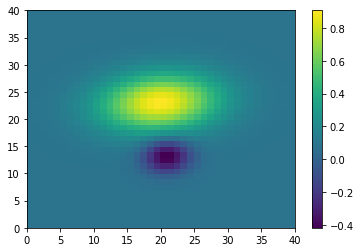

In [45]:
pcolormesh(gausssianfitp+gausssianfitn)
colorbar()

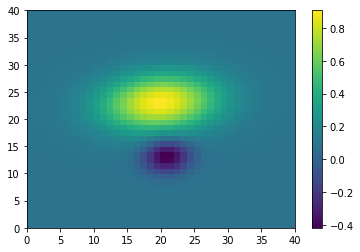

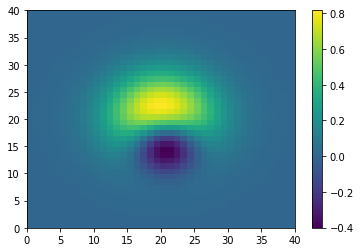

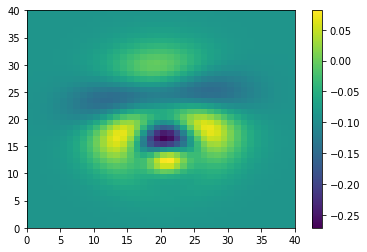

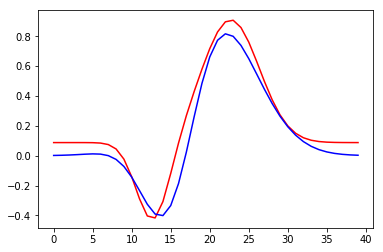

In [46]:
edp=eddyp.reshape(40, 40)
edn=eddyn.reshape(40, 40)

pcolormesh((edp+edn))
colorbar()
figure()
pcolormesh(zz[tt,:,:])
colorbar()
figure()
pcolormesh(zz[tt,:,:]-(edp+edn))
colorbar()
figure()
plot(edp[:,20]+edn[:,20],'-r')
plot(zz[tt,:,20],'-b')

In [47]:
x = np.linspace(0, 40, 40)
y = np.linspace(0, 40, 40)
x, y = np.meshgrid(x, y)
coords=[x,y]
data = twoD_Gaussian(coords,4,15,15,3,3,1,1)

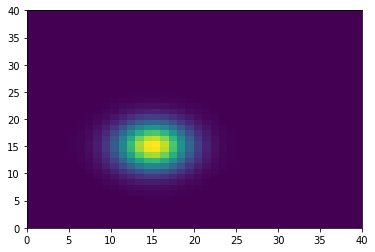

In [48]:
pcolor(data.reshape(40,40))

In [49]:
initial_guess = (4,15,15,3,3,0,0)
data_noisy = data

coords=[x,y]
popt, pcov = opt.curve_fit(twoD_Gaussian, coords, data_noisy, p0=initial_guess)

In [50]:
data_fitted = twoD_Gaussian((x,y), *popt)

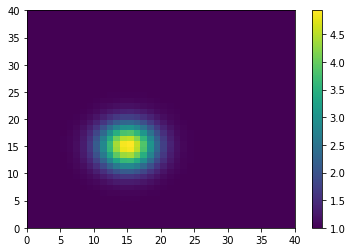

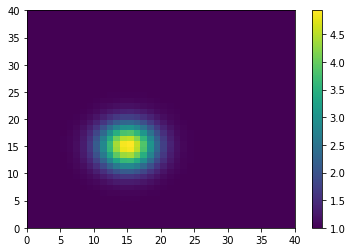

In [51]:
pcolormesh(data_fitted.reshape(40, 40))
colorbar()
figure()
pcolormesh(data.reshape(40, 40))
colorbar()

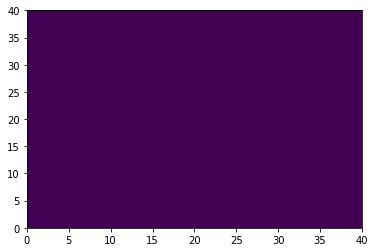

In [52]:
pcolormesh(data_fitted.reshape(40, 40) - data.reshape(40, 40))

In [53]:
zz=moveGaussian(40,10,array([[x,x*0+20] for x in linspace(20,20,40)]),40)

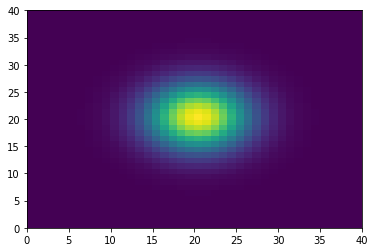

In [54]:
pcolormesh(zz[0,:,:])

In [55]:
lat=linspace(0,40,40)
lon=linspace(0,40,40)

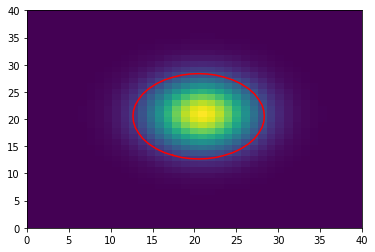

In [56]:
CS=plt.contourf(lon,lat,zz[0,:,:],levels=[0.2,10])
CONTS=CS.allsegs[:][:]
plt.pcolormesh(lon,lat,zz[0,:,:])
plot(CONTS[0][0][:,0],CONTS[0][0][:,1],'-r')